# Import Library

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

# Data Loading

In [2]:
df = pd.read_csv(r'C:\Users\alya\Downloads\loan_data_2007_2014.csv')

C:\Users\alya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


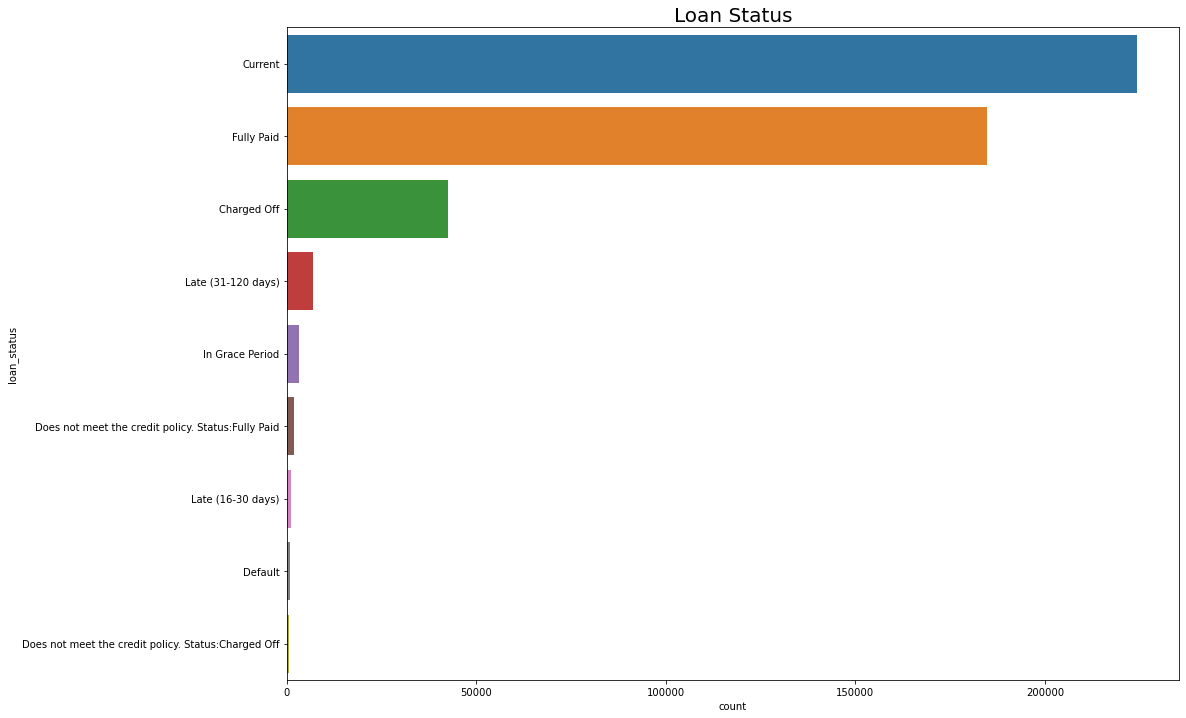

In [5]:
def plotcount(df, y, title, **sns_kwargs):
    data = df['loan_status'].value_counts()
    print(data)
    
    plt.figure(figsize=(16,12))
    plt.title(title, fontsize=20)
    sns.countplot(data = df, y = df['loan_status'], order=data.index, **sns_kwargs)

plotcount(df, y = 'loan_status', title = "Loan Status")

Drop In Grace Period and Current since it is neither good nor bad

In [6]:
df.drop(df[(df['loan_status'] == "Current")].index, inplace = True)
df.drop(df[(df['loan_status'] == "In Grace Period")].index, inplace = True)

Now, this is the current "loan_status" unique values we had

Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


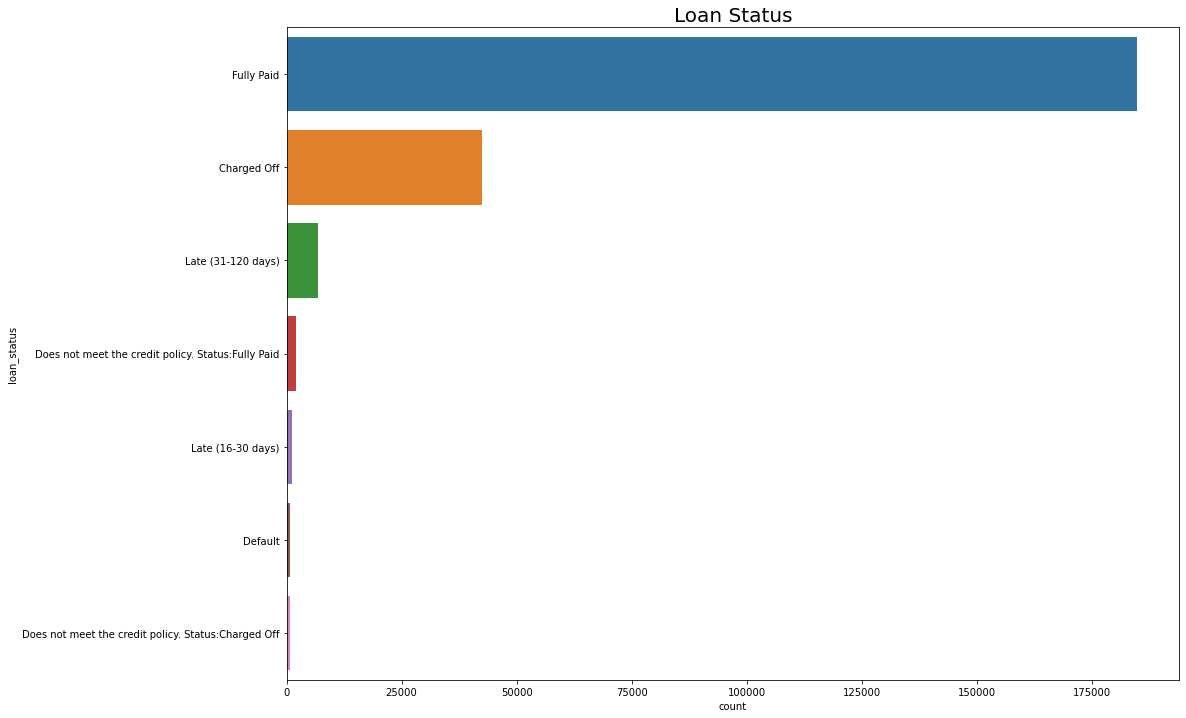

In [7]:
plotcount(df, y = 'loan_status', title = "Loan Status")

Now, let's see the description of each data in our dataframe

In [8]:
numerical = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64','int64']]
categorical = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

This is the description of the numerical data

In [9]:
df[numerical].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,238913.00000,2.389130e+05,2.389130e+05,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,2.389090e+05,238913.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.722900e+05,0.0,0.0,0.0
mean,195611.35245,8.584147e+06,9.703611e+06,13486.214647,13440.797173,13312.662461,13.855453,416.935049,7.192866e+04,16.439675,...,NaN,NaN,NaN,NaN,NaN,NaN,2.910103e+04,NaN,NaN,NaN
std,133731.94613,9.288258e+06,1.007888e+07,8066.725464,8042.190169,8080.099456,4.380770,243.750417,5.510420e+04,7.698582,...,NaN,NaN,NaN,NaN,NaN,NaN,2.854495e+04,NaN,NaN,NaN
min,0.00000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,83014.00000,1.382529e+06,1.616779e+06,7200.000000,7200.000000,7125.000000,10.990000,239.410000,4.500000e+04,10.720000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.320000e+04,NaN,NaN,NaN
50%,183235.00000,5.524581e+06,6.479428e+06,12000.000000,12000.000000,11914.311470,13.670000,365.230000,6.145000e+04,16.140000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.200000e+04,NaN,NaN,NaN
75%,296533.00000,1.248597e+07,1.445739e+07,18000.000000,18000.000000,18000.000000,16.590000,545.960000,8.600000e+04,21.880000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.620000e+04,NaN,NaN,NaN
max,466283.00000,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.013133e+06,NaN,NaN,NaN


This is the description of the categorical data

In [10]:
df[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,238913,238913,238913,225435,229688,238913,238913,238913,238913,238913,...,238913,238898,238913,238913,238884,238913,238537,11699,238890,238913
unique,2,7,35,129889,11,6,3,91,7,2,...,14,49930,875,50,634,2,98,99,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Fully Paid,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jul-15,Feb-16,Jan-16,INDIVIDUAL
freq,186469,72239,17375,1652,71312,117376,88823,9884,184739,238906,...,139085,60384,3058,40550,2033,177714,11703,7747,101680,238913


This is the value counts of each column on categorical data

In [11]:
for column in categorical:
    print('Value count on column ' + column)
    print(df[column].value_counts())
    print()

Value count on column term
 36 months    186469
 60 months     52444
Name: term, dtype: int64

Value count on column grade
B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: grade, dtype: int64

Value count on column sub_grade
B3    17375
B4    16126
C1    14012
B2    13927
B5    13414
C2    13377
C3    11923
B1    11397
C4    11232
A5    11101
C5    10498
A4    10380
D1     9529
D2     8713
D3     7613
D4     7048
A3     6753
D5     5812
A2     5765
A1     5501
E1     4370
E2     4344
E3     3541
E4     3151
E5     2680
F1     2107
F2     1684
F3     1509
F4     1143
F5      905
G1      670
G2      481
G3      332
G4      259
G5      241
Name: sub_grade, dtype: int64

Value count on column emp_title
Teacher                          1652
Manager                          1622
RN                                715
Supervisor                        712
Registered Nurse                  712
                                 ... 
COLDWELL BANKER               

# Data Preparation

Since we're going to predict the credit risk, we need to group the loan status into Good and Bad. 

Bad is when the loan status is "Charged Off", "Default","Late (31-120 days)","Does not meet the credit policy. Status:Fully Paid","Does not meet the credit policy. Status:Charged Off"

Good is when the loan status is "Fully Paid"

In [12]:
#Good and Bad Group Loan
bad = [
    "Charged Off",
    "Default",
    "Late (31-120 days)",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

good = [
    "Fully Paid"
]

Now, we standardize the loan_status into 1 (Good) and 0 (Bad)

In [13]:
def grouped_loan_status(status):
    if status in bad:
        return 0
    else:
        return 1

grouped_loan_status("Fully Paid")

1

Copy the grouped loan status values to the loan_status column in new dataframe

1    184739
0     52956
Name: loan_status, dtype: int64


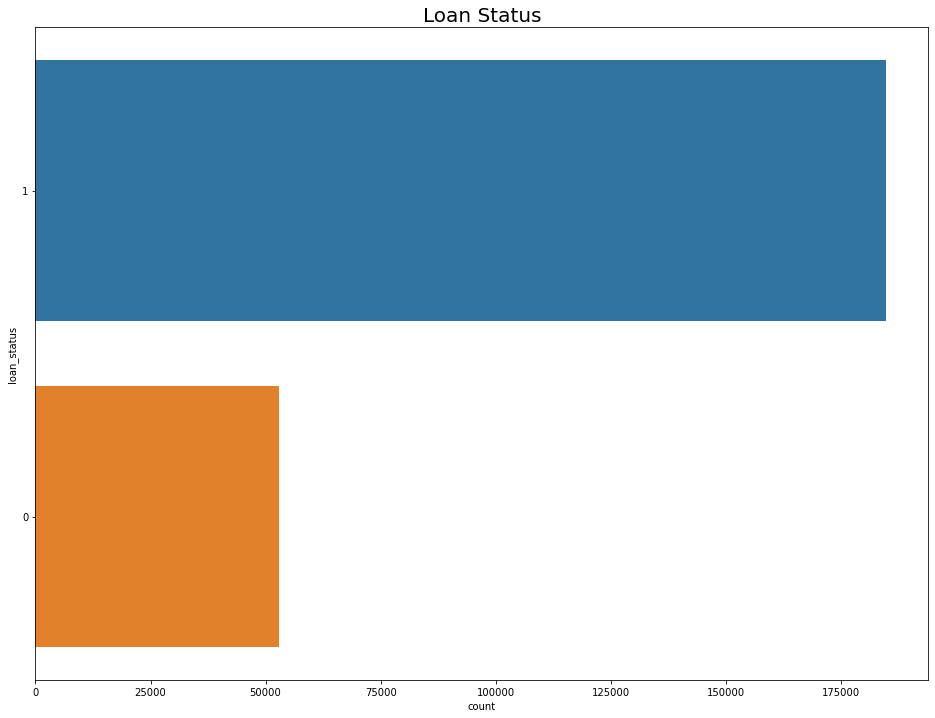

In [14]:
df_new = df[df['loan_status'].isin(bad + good)].copy()
df_new['loan_status'] = df_new['loan_status'].apply(grouped_loan_status)

plotcount(df_new, y="loan_status", title="Loan Status")

As we see from the above, the data is imbalanced. We need to do the oversampling method before we build the machine learning model

Now, we're going to drop the unnecessary column that doesn't give enough value in predicting the credit risk

In [15]:
#Drop the unnecessary column
statistics = pd.DataFrame()
statistics.index = df_new.columns
statistics["unique_value"] = df_new.nunique()
statistics["missing_rate"] = df_new.isna().mean()
statistics["dtype"] = df_new.dtypes
statistics

,unique_value,missing_rate,dtype
Unnamed: 0,237695,0.000000,int64
id,237695,0.000000,int64
member_id,237695,0.000000,int64
loan_amnt,1310,0.000000,int64
funded_amnt,1313,0.000000,int64
...,...,...,...
all_util,0,1.000000,float64
total_rev_hi_lim,9164,0.280174,float64
inq_fi,0,1.000000,float64
total_cu_tl,0,1.000000,float64


In [16]:
# Column with no values
null_col = statistics[statistics["missing_rate"] == 1].index.to_list()
print("Column with no values: ")
print(null_col)
print()

# Column that has too unique values
too_unique_col = statistics[statistics["unique_value"] == df_new.shape[0]].index.to_list()
print("Column that has too unique values:")
print(too_unique_col)
print()

# Column that has too various category
cat_col_stat = statistics[statistics["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 1000].index.to_list()
print("Column that has too various category:")
print(vari_cat_col)
print()

# Column that has single values
single_valued_col = statistics[statistics["unique_value"] == 1].index.to_list()
print("Column that has single values:")
print(single_valued_col)
print()

removed_features = null_col + too_unique_col + vari_cat_col + single_valued_col

Column with no values: 
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Column that has too unique values:
['Unnamed: 0', 'id', 'member_id', 'url']

Column that has too various category:
['emp_title', 'url', 'desc', 'title']

Column that has single values:
['policy_code', 'application_type']



Select only the necessary column and copy to new dataframe

In [17]:
df_new_2 = df_new.loc[:, ~df_new.columns.isin(removed_features)].copy()
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    237695 non-null  int64  
 1   funded_amnt                  237695 non-null  int64  
 2   funded_amnt_inv              237695 non-null  float64
 3   term                         237695 non-null  object 
 4   int_rate                     237695 non-null  float64
 5   installment                  237695 non-null  float64
 6   grade                        237695 non-null  object 
 7   sub_grade                    237695 non-null  object 
 8   emp_length                   228539 non-null  object 
 9   home_ownership               237695 non-null  object 
 10  annual_inc                   237691 non-null  float64
 11  verification_status          237695 non-null  object 
 12  issue_d                      237695 non-null  object 
 13 

Check the correlation between loan_status column and the numerical column in order to choose the best parameters

In [18]:
# Check the correlations between the loan_status and the numerical column
correlations = (df_new_2.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

data = correlations["loan_status"].abs().sort_values(ascending=False)
data

loan_status                    1.000000
total_rec_prncp                0.469205
recoveries                     0.409024
last_pymnt_amnt                0.403200
total_pymnt_inv                0.362003
total_pymnt                    0.359668
out_prncp                      0.280483
out_prncp_inv                  0.280472
collection_recovery_fee        0.275679
int_rate                       0.251108
total_rec_late_fee             0.165734
dti                            0.119055
inq_last_6mths                 0.107468
revol_util                     0.093994
tot_cur_bal                    0.077290
total_rec_int                  0.063272
annual_inc                     0.060383
loan_amnt                      0.060230
funded_amnt                    0.060127
mths_since_last_record         0.056226
total_rev_hi_lim               0.055497
funded_amnt_inv                0.052586
installment                    0.042451
mths_since_last_delinq         0.033466
delinq_2yrs                    0.028245


Colum that has correlation more than 0.1 are choosen

In [19]:
# Choosing the numerical column
n = 0
choosen_numeric = []
for i in data.values:
    if i > 0.1:
        choosen_numeric.append(data.index[n])
    n += 1
    
choosen_numeric

['loan_status',
 'total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'total_pymnt_inv',
 'total_pymnt',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'inq_last_6mths']

Check the correlation between loan_status column and the date column in order to choose the best parameters

In [20]:
#choosing date column
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]

for col in date_cols:
    print(df_new_2[col].value_counts().iloc[:5])
    print()

Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
Name: issue_d, dtype: int64

Oct-00    2027
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
Name: earliest_cr_line, dtype: int64

Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
Name: last_pymnt_d, dtype: int64

Jan-16    100480
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
Name: last_credit_pull_d, dtype: int64

Feb-16    6845
Jan-16     897
Mar-11     107
Apr-11     101
Feb-11      91
Name: next_pymnt_d, dtype: int64



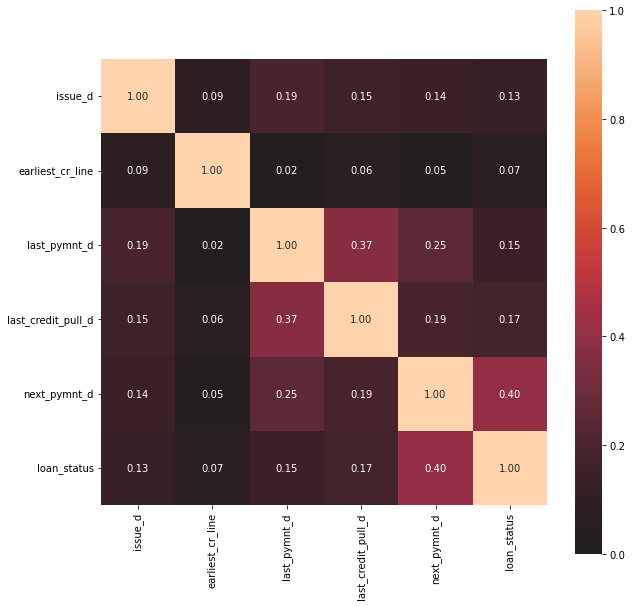

In [21]:
#check the correlation
date_loan_corr = date_cols + ["loan_status"]
from dython.nominal import associations
complete_correlation = associations(
    df_new_2[date_loan_corr], 
    filename='date_correlation.png',
    figsize=(10,10)
)

From the heatmap, we can conclude that the earliest_cr_line has the slightest correlation with the loan_status. So, we don't choose that column.

In [22]:
choosen_date = ["issue_d", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]

Check the categorical column that has strong correlation with the loan_status column

In [23]:
#check categorical column
categorical_features = df_new_2.select_dtypes(include = object).columns
categorical_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

There's a few date column in categorical column that need to be unselect

In [24]:
categorical_features_clean = categorical_features[~categorical_features.isin(date_cols)]
categorical_features_clean

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

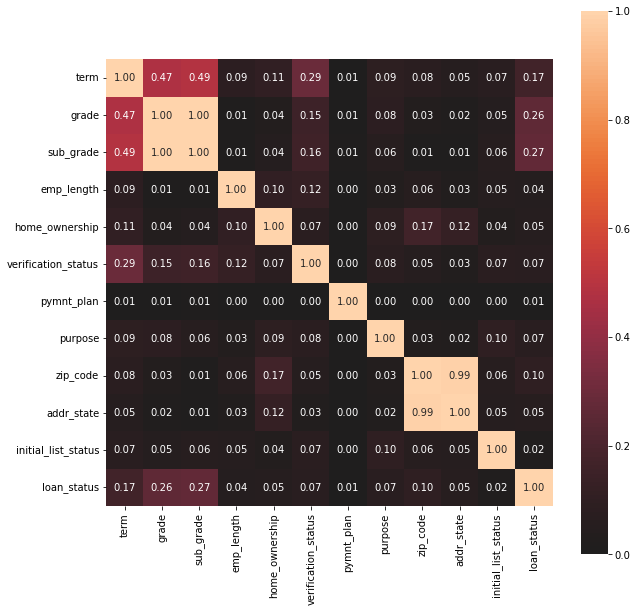

In [25]:
#check the correlation
cat_loan_corr = categorical_features_clean.to_list() + ["loan_status"]
complete_correlation = associations(
    df_new_2[cat_loan_corr], 
    filename='cat_loan_correlation.png',
    figsize=(10,10)
)

From the heatmap above, we can see that 'term', 'grade', and 'sub_grade' has the strongest correlation with the loan_status columns

In [26]:
choosen_categorical = ['term', 'grade', 'sub_grade']

Now, combine the choosen numerical, date, and categorical column into a new dataframe

In [27]:
choosen = choosen_numeric + choosen_date + choosen_categorical
choosen_df = df_new_2[choosen]

Check null values

In [28]:
choosen_df.isna().mean().sort_values(ascending=False)

next_pymnt_d               0.955906
last_pymnt_d               0.001582
inq_last_6mths             0.000122
last_credit_pull_d         0.000097
loan_status                0.000000
total_rec_prncp            0.000000
grade                      0.000000
term                       0.000000
issue_d                    0.000000
dti                        0.000000
total_rec_late_fee         0.000000
int_rate                   0.000000
collection_recovery_fee    0.000000
out_prncp_inv              0.000000
out_prncp                  0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
last_pymnt_amnt            0.000000
recoveries                 0.000000
sub_grade                  0.000000
dtype: float64

In [29]:
#replace the null values with paid off because we assume that the loan has been paid

choosen_df["next_pymnt_d"] = choosen_df["next_pymnt_d"].fillna("paid off")
choosen_df["last_pymnt_d"] = choosen_df["last_pymnt_d"].fillna("paid off")
choosen_df["last_credit_pull_d"] = choosen_df["last_credit_pull_d"].fillna("paid off")

#fill the null with mode
mode = choosen_df['inq_last_6mths'].mode().values[0]
choosen_df['inq_last_6mths'] = choosen_df['inq_last_6mths'].fillna(mode)

C:\Users\alya\AppData\Local\Temp/ipykernel_18780/1911735901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choosen_df["next_pymnt_d"] = choosen_df["next_pymnt_d"].fillna("paid off")
C:\Users\alya\AppData\Local\Temp/ipykernel_18780/1911735901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choosen_df["last_pymnt_d"] = choosen_df["last_pymnt_d"].fillna("paid off")
C:\Users\alya\AppData\Local\Temp/ipykernel_18780/1911735901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [30]:
choosen_df.isna().mean().sort_values(ascending=False)

loan_status                0.0
total_rec_prncp            0.0
grade                      0.0
term                       0.0
next_pymnt_d               0.0
last_credit_pull_d         0.0
last_pymnt_d               0.0
issue_d                    0.0
inq_last_6mths             0.0
dti                        0.0
total_rec_late_fee         0.0
int_rate                   0.0
collection_recovery_fee    0.0
out_prncp_inv              0.0
out_prncp                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
last_pymnt_amnt            0.0
recoveries                 0.0
sub_grade                  0.0
dtype: float64

In [31]:
choosen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_status              237695 non-null  int64  
 1   total_rec_prncp          237695 non-null  float64
 2   recoveries               237695 non-null  float64
 3   last_pymnt_amnt          237695 non-null  float64
 4   total_pymnt_inv          237695 non-null  float64
 5   total_pymnt              237695 non-null  float64
 6   out_prncp                237695 non-null  float64
 7   out_prncp_inv            237695 non-null  float64
 8   collection_recovery_fee  237695 non-null  float64
 9   int_rate                 237695 non-null  float64
 10  total_rec_late_fee       237695 non-null  float64
 11  dti                      237695 non-null  float64
 12  inq_last_6mths           237695 non-null  float64
 13  issue_d                  237695 non-null  object 
 14  last

Change the object datatype into category datatype because the categorical data will be encoded

In [32]:
list_str_obj_cols = choosen_df.columns[choosen_df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    choosen_df[str_obj_col] = choosen_df[str_obj_col].astype("category")

choosen_df.info()

C:\Users\alya\AppData\Local\Temp/ipykernel_18780/2056054930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choosen_df[str_obj_col] = choosen_df[str_obj_col].astype("category")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   loan_status              237695 non-null  int64   
 1   total_rec_prncp          237695 non-null  float64 
 2   recoveries               237695 non-null  float64 
 3   last_pymnt_amnt          237695 non-null  float64 
 4   total_pymnt_inv          237695 non-null  float64 
 5   total_pymnt              237695 non-null  float64 
 6   out_prncp                237695 non-null  float64 
 7   out_prncp_inv            237695 non-null  float64 
 8   collection_recovery_fee  237695 non-null  float64 
 9   int_rate                 237695 non-null  float64 
 10  total_rec_late_fee       237695 non-null  float64 
 11  dti                      237695 non-null  float64 
 12  inq_last_6mths           237695 non-null  float64 
 13  issue_d                  237695 non-null  ca

# Data Modelling

In [33]:
df_train = choosen_df

In [34]:
x = df_train.drop(columns = 'loan_status')
y = choosen_df['loan_status']

In [35]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=24)

## Normalization for data train

In [36]:
#separate the numeric and categoric column
numeric_train = x_train.select_dtypes(exclude = 'category')
categoric_train = x_train.select_dtypes(include = 'category')

In [37]:
#standardization for numeric (train)
numeric_train = (numeric_train - numeric_train.mean()) / numeric_train.std()
numeric_train

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv,collection_recovery_fee,int_rate,total_rec_late_fee,dti,inq_last_6mths
28154,0.140431,-0.218240,-0.781755,0.455483,0.442023,-0.150071,-0.150066,-0.146277,0.312361,-0.147904,0.965326,-0.771513
21358,0.599848,-0.218240,0.127565,0.797112,0.787498,-0.150071,-0.150066,-0.146277,-0.369145,-0.147904,-0.008553,0.078957
28472,-0.502753,-0.218240,-0.796334,-0.576198,-0.590854,-0.150071,-0.150066,-0.146277,-1.448576,-0.147904,-1.556372,-0.771513
93597,-0.943174,1.321387,-0.771775,-0.781986,-0.796880,-0.150071,-0.150066,-0.048037,-0.181617,-0.147904,0.674461,-0.771513
98520,-0.282233,-0.218240,0.324808,-0.404033,-0.418489,-0.150071,-0.150066,-0.146277,0.465585,-0.147904,-0.578597,0.078957
...,...,...,...,...,...,...,...,...,...,...,...,...
219154,0.032088,2.081987,-0.712450,0.393558,0.380026,-0.150071,-0.150066,-0.000749,-0.167895,-0.147904,-0.081269,-0.771513
338432,0.330323,-0.218240,0.671958,0.231675,0.217955,-0.150071,-0.150066,-0.146277,-0.113009,-0.147904,-0.679881,-0.771513
414085,-0.671206,-0.218240,-0.212999,-0.731037,-0.745873,-0.150071,-0.150066,-0.146277,0.335230,-0.147904,1.350982,1.779899
399904,-0.037210,-0.218240,0.710829,-0.203873,-0.218098,-0.150071,-0.150066,-0.146277,0.335230,-0.147904,-1.938133,1.779899


In [38]:
#one-hot encoding for categoric (train)
categoric_train = pd.get_dummies(categoric_train)
categoric_train

,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
28154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414085,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization for data test

In [39]:
numeric_test = x_test.select_dtypes(exclude = 'category')
categoric_test = x_test.select_dtypes(include = 'category')

In [40]:
#standardization for numeric (test)
numeric_test = (numeric_test - numeric_test.mean()) / numeric_test.std()
numeric_test

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv,collection_recovery_fee,int_rate,total_rec_late_fee,dti,inq_last_6mths
226381,0.597362,-0.221984,-0.756623,0.501416,0.488005,-0.150566,-0.150558,-0.152895,-1.350457,-0.1444,0.082295,-0.776403
118300,-1.084445,-0.207378,-0.728504,-0.672125,-0.687607,-0.150566,-0.150558,-0.152895,2.419340,-0.1444,0.650821,0.939118
206041,-1.021590,0.739331,-0.788331,-0.686508,-0.702016,-0.150566,-0.150558,-0.089750,1.181666,-0.1444,0.052303,0.081357
123808,0.107328,-0.221984,0.511259,0.298735,0.284966,-0.150566,-0.150558,-0.152895,1.333820,-0.1444,-0.057229,0.081357
121899,0.903633,-0.221984,0.737675,0.827526,0.814691,-0.150566,-0.150558,-0.152895,-0.521556,-0.1444,-0.761367,0.081357
...,...,...,...,...,...,...,...,...,...,...,...,...
117570,-0.137689,-0.221984,-0.374647,-0.221120,-0.235806,-0.150566,-0.150558,-0.152895,-0.939413,-0.1444,-1.439426,-0.776403
93022,1.577430,-0.221984,2.585738,1.428823,1.417048,-0.150566,-0.150558,-0.152895,2.192244,-0.1444,0.138365,1.796879
173590,0.689244,-0.221984,1.120145,0.794647,0.788371,-0.150566,-0.150558,-0.152895,0.777434,-0.1444,0.731666,0.939118
222347,-0.505214,-0.221984,0.013626,-0.642121,-0.657550,-0.150566,-0.150558,-0.152895,-1.775127,-0.1444,-1.187762,-0.776403


In [41]:
#standardization for categoric (test)
categoric_test = pd.get_dummies(categoric_test)
categoric_test

,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
226381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118300,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
206041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93022,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
173590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222347,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concating features for train and test

In [42]:
features_train = pd.concat([numeric_train , categoric_train ], axis=1)
features_train 

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv,collection_recovery_fee,int_rate,total_rec_late_fee,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
28154,0.140431,-0.218240,-0.781755,0.455483,0.442023,-0.150071,-0.150066,-0.146277,0.312361,-0.147904,...,0,0,0,0,0,0,0,0,0,0
21358,0.599848,-0.218240,0.127565,0.797112,0.787498,-0.150071,-0.150066,-0.146277,-0.369145,-0.147904,...,0,0,0,0,0,0,0,0,0,0
28472,-0.502753,-0.218240,-0.796334,-0.576198,-0.590854,-0.150071,-0.150066,-0.146277,-1.448576,-0.147904,...,0,0,0,0,0,0,0,0,0,0
93597,-0.943174,1.321387,-0.771775,-0.781986,-0.796880,-0.150071,-0.150066,-0.048037,-0.181617,-0.147904,...,0,0,0,0,0,0,0,0,0,0
98520,-0.282233,-0.218240,0.324808,-0.404033,-0.418489,-0.150071,-0.150066,-0.146277,0.465585,-0.147904,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219154,0.032088,2.081987,-0.712450,0.393558,0.380026,-0.150071,-0.150066,-0.000749,-0.167895,-0.147904,...,0,0,0,0,0,0,0,0,0,0
338432,0.330323,-0.218240,0.671958,0.231675,0.217955,-0.150071,-0.150066,-0.146277,-0.113009,-0.147904,...,0,0,0,0,0,0,0,0,0,0
414085,-0.671206,-0.218240,-0.212999,-0.731037,-0.745873,-0.150071,-0.150066,-0.146277,0.335230,-0.147904,...,0,0,0,0,0,0,0,0,0,0
399904,-0.037210,-0.218240,0.710829,-0.203873,-0.218098,-0.150071,-0.150066,-0.146277,0.335230,-0.147904,...,0,0,0,0,0,0,0,0,0,0


In [43]:
features_test = pd.concat([numeric_test, categoric_test], axis=1)
features_test

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv,collection_recovery_fee,int_rate,total_rec_late_fee,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
226381,0.597362,-0.221984,-0.756623,0.501416,0.488005,-0.150566,-0.150558,-0.152895,-1.350457,-0.1444,...,0,0,0,0,0,0,0,0,0,0
118300,-1.084445,-0.207378,-0.728504,-0.672125,-0.687607,-0.150566,-0.150558,-0.152895,2.419340,-0.1444,...,0,0,1,0,0,0,0,0,0,0
206041,-1.021590,0.739331,-0.788331,-0.686508,-0.702016,-0.150566,-0.150558,-0.089750,1.181666,-0.1444,...,0,0,0,0,0,0,0,0,0,0
123808,0.107328,-0.221984,0.511259,0.298735,0.284966,-0.150566,-0.150558,-0.152895,1.333820,-0.1444,...,0,0,0,0,0,0,0,0,0,0
121899,0.903633,-0.221984,0.737675,0.827526,0.814691,-0.150566,-0.150558,-0.152895,-0.521556,-0.1444,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117570,-0.137689,-0.221984,-0.374647,-0.221120,-0.235806,-0.150566,-0.150558,-0.152895,-0.939413,-0.1444,...,0,0,0,0,0,0,0,0,0,0
93022,1.577430,-0.221984,2.585738,1.428823,1.417048,-0.150566,-0.150558,-0.152895,2.192244,-0.1444,...,1,0,0,0,0,0,0,0,0,0
173590,0.689244,-0.221984,1.120145,0.794647,0.788371,-0.150566,-0.150558,-0.152895,0.777434,-0.1444,...,0,0,0,0,0,0,0,0,0,0
222347,-0.505214,-0.221984,0.013626,-0.642121,-0.657550,-0.150566,-0.150558,-0.152895,-1.775127,-0.1444,...,0,0,0,0,0,0,0,0,0,0


## Oversampling using SMOTE

Due to the imbalanced data in the loan_status, we need to perform the oversampling method

In [44]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_sample(features_train, y_train)

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 147833
Before OverSampling, counts of label '0': 42323 

After OverSampling, counts of label '1': 147833
After OverSampling, counts of label '0': 147833


## Classifications Models

In this step, we're going to use the Logistic Regression algorithm because it is used for supervised classification problem and is based on the concept of probability

In [46]:
# Using Logistic Regression library to make classifier
clf = LogisticRegression()

# Fit the training data into the classifier
clf.fit(x_train_res, y_train_res.ravel())

# Fit the testing data into the predictions variable
predictions = clf.predict(features_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10633
           1       0.99      0.99      0.99     36906

    accuracy                           0.99     47539
   macro avg       0.98      0.98      0.98     47539
weighted avg       0.99      0.99      0.99     47539



C:\Users\alya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
print(confusion_matrix(y_test, predictions))

[[10260   373]
 [  217 36689]]


In [48]:
print("Accuracy", metrics.accuracy_score(y_test, predictions))

Accuracy 0.9875891373398683


# Model Evaluation

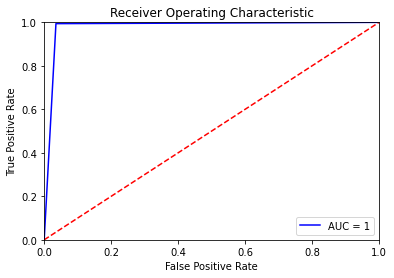

In [49]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
